In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import sklearn.linear_model as linear_model 
from sklearn.metrics import mean_absolute_error, mean_squared_error

### Reading data

In [5]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

In [6]:
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


### Defining which features matters the most

In [7]:
(train.corr()**2)['SalePrice'].sort_values(ascending=False)[:20]

SalePrice       1.000000
OverallQual     0.625652
GrLivArea       0.502149
GarageCars      0.410124
GarageArea      0.388667
TotalBsmtSF     0.376481
1stFlrSF        0.367057
FullBath        0.314344
TotRmsAbvGrd    0.284860
YearBuilt       0.273422
YearRemodAdd    0.257151
GarageYrBlt     0.236548
MasVnrArea      0.228000
Fireplaces      0.218023
BsmtFinSF1      0.149320
LotFrontage     0.123763
WoodDeckSF      0.105244
2ndFlrSF        0.101974
OpenPorchSF     0.099765
HalfBath        0.080717
Name: SalePrice, dtype: float64

### Visualize the data (graf)

In [8]:
def plotting_3_chart(df, feature):
    import seaborn as sns
    import matplotlib.pyplot as plt
    import matplotlib.gridspec as gridspec
    from scipy import stats
    import matplotlib.style as style
    style.use('fivethirtyeight')
    
    # ... creating a customized chart and gining an figsize and everything ...
    fig = plt.figure(constrained_layout=True, figsize=(12,8))
    # ... creating a grid 3x3 ...
    grid = gridspec.GridSpec(ncols=3, nrows=3, figure=fig)
    # gs = fig3.add_gridspec(3,3)
    
    # ... customizing the histogram grid ...
    ax1 = fig.add_subplot(grid[0, :2])
    # ... set the title ...
    ax1.set_title('Histogram')
    # ... plot the histograg ...
    sns.distplot(df.loc[:, feature], norm_hist=True, ax=ax1)
    
    # ... customizing the QQ_plot ...
    ax2 = fig.add_subplot(grid[1, :2])
    # ... set the title ...
    ax2.set_title('QQ_plot')
    # ... plotting the QQ_plot ...
    stats.probplot(df.loc[:, feature], plot=ax2)
    
    # ... customizing the box plot ...
    ax3 = fig.add_subplot(grid[:, 2])
    # ... set the title
    ax3.set_title('Box Plot')
    # ... plotting the bpx plot ...
    sns.boxplot(df.loc[:, feature], orient='v', ax=ax3)
    
    

/Users/marie/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/marie/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/marie/opt/anaconda3/lib/python3.8/site-packages/seaborn/_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/Users/marie/opt/anaconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWa

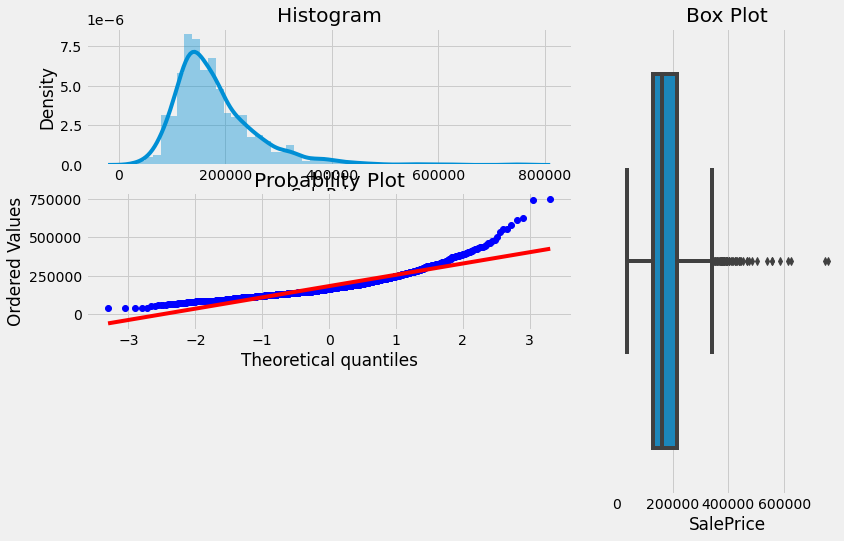

In [9]:
plotting_3_chart(train, 'SalePrice')

### Normal Destribution

In [10]:
train['SalePrice'] = np.log1p(train['SalePrice']) # logarithm to normalize

/Users/marie/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/marie/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/marie/opt/anaconda3/lib/python3.8/site-packages/seaborn/_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/Users/marie/opt/anaconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWa

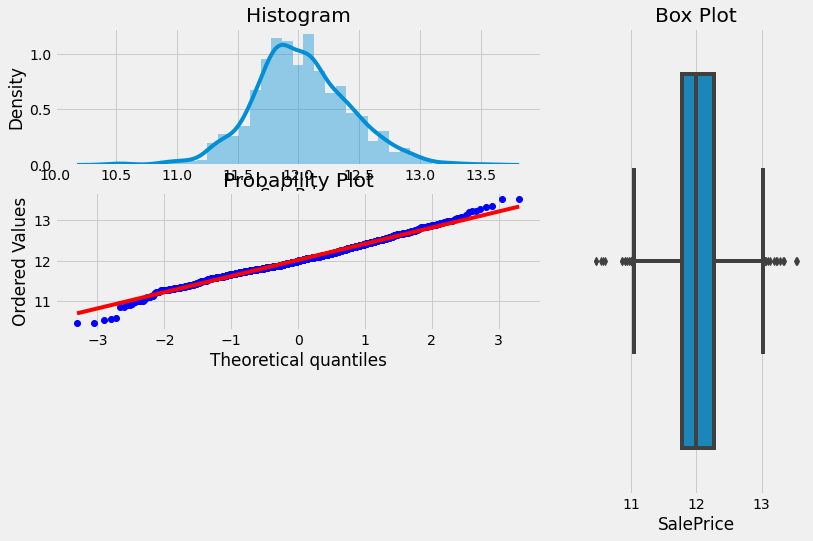

In [11]:
plotting_3_chart(train, 'SalePrice')

 ## Data Preparation

In [12]:
# combine test and train data
all_data = pd.concat((train, test)).reset_index(drop=True)
all_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,12.247699
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,12.109016
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,12.317171
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,11.849405
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,12.429220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
2915,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
2916,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN
2917,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN


In [13]:
all_data.drop(['SalePrice'], axis=1, inplace=True)
all_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


## Missing Values

In [14]:
print(all_data.isnull().sum().to_string())

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       486
LotArea             0
Street              0
Alley            2721
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         24
MasVnrArea         23
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           81
BsmtCond           82
BsmtExposure       82
BsmtFinType1       79
BsmtFinSF1          1
BsmtFinType2       80
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [15]:
Na_columns = ['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
             'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
              'PoolQC', 'Fence', 'MiscFeature', 'MasVnrType', 'MSZoning']

for item in Na_columns:
    all_data[item] = all_data[item].fillna('None')

all_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,0,0,None,None,None,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,0,0,None,None,None,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,...,0,0,None,None,None,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,...,0,0,None,None,None,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,...,0,0,None,None,None,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2915,160,RM,21.0,1936,Pave,None,Reg,Lvl,AllPub,...,0,0,None,None,None,0,6,2006,WD,Normal
2915,2916,160,RM,21.0,1894,Pave,None,Reg,Lvl,AllPub,...,0,0,None,None,None,0,4,2006,WD,Abnorml
2916,2917,20,RL,160.0,20000,Pave,None,Reg,Lvl,AllPub,...,0,0,None,None,None,0,9,2006,WD,Abnorml
2917,2918,85,RL,62.0,10441,Pave,None,Reg,Lvl,AllPub,...,0,0,None,MnPrv,Shed,700,7,2006,WD,Normal


### Data cleaning

In [16]:
# some features consist of numbers that are actually categories so we will convert to str
# so they get binarized later

all_data['OverallCond'] = all_data['OverallCond'].astype(str)
all_data['OverallQual'] = all_data['OverallQual'].astype(str)
all_data['MSSubClass'] = all_data['MSSubClass'].astype(str)
all_data['YearBuilt'] = all_data['YearBuilt'].astype(str)
all_data['YearRemodAdd'] = all_data['YearRemodAdd'].astype(str)
all_data['GarageYrBlt'] = all_data['GarageYrBlt'].astype(str)
all_data['YrSold'] = all_data['YrSold'].astype(str)
all_data['MoSold'] = all_data['MoSold'].astype(str)

### Function to see missing values

In [17]:
def missing_percentage(df):
    total = df.isnull().sum().sort_values(ascending=False)[df.isnull().sum().sort_values(ascending=False) != 0]
    percent = round(df.isnull().sum().sort_values(ascending=False)/len(df)*100,2)[round(df.isnull().sum().sort_values(ascending = False) / len(df)*100,2) != 0]
    data_type = df.dtypes.sort_values(ascending=False)[df.isnull().sum().sort_values(ascending=False) != 0]
    return pd.concat([total, percent, data_type], axis=1, keys=['Total', 'Percent', 'Type'])
missing_percentage(all_data)

,Total,Percent,Type
LotFrontage,486,16.65,float64
MasVnrArea,23,0.79,float64
Functional,2,0.07,object
BsmtHalfBath,2,0.07,float64
BsmtFullBath,2,0.07,float64
Utilities,2,0.07,object
KitchenQual,1,0.03,object
Exterior1st,1,0.03,object
Exterior2nd,1,0.03,object
GarageCars,1,0.03,float64


In [18]:
# filling with default values
all_data['Functional'] = all_data['Functional'].fillna('Typ')
all_data['Utilities'] = all_data['Utilities'].fillna('AllPub')
all_data['SaleType'] = all_data['SaleType'].fillna('Oth')
all_data['Electrical'] = all_data['Electrical'].fillna('SBrkr')

# if data is missing there is none
all_data['LotFrontage'] = all_data['LotFrontage'].fillna(0)
all_data['MasVnrArea'] = all_data['MasVnrArea'].fillna(0)
all_data['BsmtFullBath'] = all_data['BsmtFullBath'].fillna(0)
all_data['BsmtHalfBath'] = all_data['BsmtHalfBath'].fillna(0)
all_data['BsmtFinSF1'] = all_data['BsmtFinSF1'].fillna(0)
all_data['BsmtFinSF2'] = all_data['BsmtFinSF2'].fillna(0)
all_data['TotalBsmtSF'] = all_data['TotalBsmtSF'].fillna(0)
all_data['GarageCars'] = all_data['GarageCars'].fillna(0)
all_data['GarageYrBlt'] = all_data['GarageYrBlt'].fillna(0)
all_data['GarageArea'] = all_data['GarageArea'].fillna(0)
all_data['BsmtUnfSF'] = all_data['BsmtUnfSF'].fillna(0)

# filling with most common values
all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])
all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])


In [19]:
missing_percentage(all_data)

,Total,Percent,Type


## Feature Selection

In [20]:
all_data['PoolArea'].value_counts()

0      2906
561       1
555       1
519       1
800       1
738       1
648       1
576       1
512       1
480       1
444       1
368       1
228       1
144       1
Name: PoolArea, dtype: int64

In [21]:
# basement + floor 1 + floor 2
all_data['TotalSQFT'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']

# strings -> concatenate
all_data['YearBuilt/remodelled'] = (all_data['YearBuilt'] + all_data['YearRemodAdd'])

all_data['BSMT'] = all_data['1stFlrSF'] + all_data['2ndFlrSF']

all_data['TotalBathroom'] = (all_data['FullBath'] + all_data['HalfBath'] + all_data['BsmtFullBath'] + all_data['BsmtHalfBath'])


In [22]:
# there are ordinal scales which will be converted to numbers (excellent - good - poor is 3-2-1)

# removing duplicates from list
def Dup(x):
    return list(dict.fromkeys(x))

columns_2_order = ['LotShape', 'Utilities', 'LandSlope', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond',
                  'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'KitchenQual', 'FireplaceQu', 'GarageFinish',
                  'GarageQual', 'GarageCond', 'PoolQC', 'Fence']

# converting original categorical features to scales
for item in columns_2_order:
    n = len(Dup(all_data[item]))
    sample_dic = {}
    vlist = []
    nlist = []
    
    for val in Dup(all_data[item]):
        vlist.append(val)
        nlist.append(n)
        n -= 1
    sample_dic = dict(zip(vlist, nlist))
    all_data[item] = all_data[item].map(sample_dic)


## check if house have it (pool / garage ...)

In [23]:
all_data['hasPool'] = all_data['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
all_data['has2ndFloor'] = all_data['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
all_data['hasGarage'] = all_data['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
all_data['hasBsmt'] = all_data['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
all_data['hasFireplace'] = all_data['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)

## get_dummies() for categorical features

In [24]:
final_features = pd.get_dummies(all_data).reset_index(drop=True)
final_features

,Id,LotFrontage,LotArea,LotShape,Utilities,LandSlope,MasVnrArea,ExterQual,ExterCond,BsmtQual,...,YearBuilt/remodelled_20052007,YearBuilt/remodelled_20062006,YearBuilt/remodelled_20062007,YearBuilt/remodelled_20072007,YearBuilt/remodelled_20072008,YearBuilt/remodelled_20082008,YearBuilt/remodelled_20082009,YearBuilt/remodelled_20092009,YearBuilt/remodelled_20092010,YearBuilt/remodelled_20102010
0,1,65.0,8450,4,2,3,196.0,4,5,5,...,0,0,0,0,0,0,0,0,0,0
1,2,80.0,9600,4,2,3,0.0,3,5,5,...,0,0,0,0,0,0,0,0,0,0
2,3,68.0,11250,3,2,3,162.0,4,5,5,...,0,0,0,0,0,0,0,0,0,0
3,4,60.0,9550,3,2,3,0.0,3,5,4,...,0,0,0,0,0,0,0,0,0,0
4,5,84.0,14260,3,2,3,350.0,4,5,5,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2915,21.0,1936,4,2,3,0.0,3,5,4,...,0,0,0,0,0,0,0,0,0,0
2915,2916,21.0,1894,4,2,3,0.0,3,5,4,...,0,0,0,0,0,0,0,0,0,0
2916,2917,160.0,20000,4,2,3,0.0,3,5,4,...,0,0,0,0,0,0,0,0,0,0
2917,2918,62.0,10441,4,2,3,0.0,3,5,5,...,0,0,0,0,0,0,0,0,0,0


In [25]:
final_features.drop('Id', axis=1, inplace=True)
final_features

,LotFrontage,LotArea,LotShape,Utilities,LandSlope,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,...,YearBuilt/remodelled_20052007,YearBuilt/remodelled_20062006,YearBuilt/remodelled_20062007,YearBuilt/remodelled_20072007,YearBuilt/remodelled_20072008,YearBuilt/remodelled_20082008,YearBuilt/remodelled_20082009,YearBuilt/remodelled_20092009,YearBuilt/remodelled_20092010,YearBuilt/remodelled_20102010
0,65.0,8450,4,2,3,196.0,4,5,5,5,...,0,0,0,0,0,0,0,0,0,0
1,80.0,9600,4,2,3,0.0,3,5,5,5,...,0,0,0,0,0,0,0,0,0,0
2,68.0,11250,3,2,3,162.0,4,5,5,5,...,0,0,0,0,0,0,0,0,0,0
3,60.0,9550,3,2,3,0.0,3,5,4,4,...,0,0,0,0,0,0,0,0,0,0
4,84.0,14260,3,2,3,350.0,4,5,5,5,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,21.0,1936,4,2,3,0.0,3,5,4,5,...,0,0,0,0,0,0,0,0,0,0
2915,21.0,1894,4,2,3,0.0,3,5,4,5,...,0,0,0,0,0,0,0,0,0,0
2916,160.0,20000,4,2,3,0.0,3,5,4,5,...,0,0,0,0,0,0,0,0,0,0
2917,62.0,10441,4,2,3,0.0,3,5,5,5,...,0,0,0,0,0,0,0,0,0,0


## Splitting Data on test and train

In [26]:
x = final_features[:1460]
x_test = final_features[1460:]

y = pd.DataFrame(data = train['SalePrice'])

In [27]:
#
# too many columns. Which categories contributes the most?
# PCA = Python's Scikit-learn Library
sc = StandardScaler()
x = sc.fit_transform(x)


In [28]:
pca_com = 250
pca = PCA(n_components=1212) #978
x = pca.fit_transform(x)

In [29]:
explained_variance = pca.explained_variance_ratio_

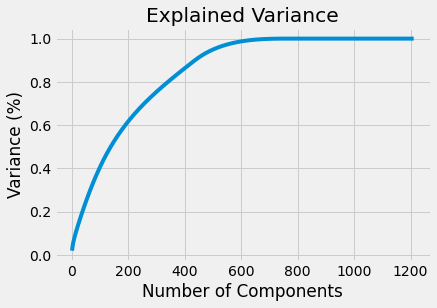

In [30]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)')
plt.title('Explained Variance')
plt.show()

In [31]:
# order columns by their variance and take the first 250
var_matrix = (pd.concat([pd.DataFrame(list(final_features.columns), columns = ['Factors']),
                        pd.DataFrame(list(explained_variance**2), columns=['^2 Variance'])],
                        axis=1).sort_values(by='^2 Variance', ascending=False)[0:pca_com])

list(var_matrix['Factors'])
x_new = final_features[list(var_matrix['Factors'])]

x_new

,LotFrontage,LotArea,LotShape,Utilities,LandSlope,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,...,YearBuilt_1970,YearBuilt_1971,YearBuilt_1972,YearBuilt_1973,YearBuilt_1974,YearBuilt_1975,YearBuilt_1976,YearBuilt_1977,YearBuilt_1978,YearBuilt_1979
0,65.0,8450,4,2,3,196.0,4,5,5,5,...,0,0,0,0,0,0,0,0,0,0
1,80.0,9600,4,2,3,0.0,3,5,5,5,...,0,0,0,0,0,0,1,0,0,0
2,68.0,11250,3,2,3,162.0,4,5,5,5,...,0,0,0,0,0,0,0,0,0,0
3,60.0,9550,3,2,3,0.0,3,5,4,4,...,0,0,0,0,0,0,0,0,0,0
4,84.0,14260,3,2,3,350.0,4,5,5,5,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,21.0,1936,4,2,3,0.0,3,5,4,5,...,1,0,0,0,0,0,0,0,0,0
2915,21.0,1894,4,2,3,0.0,3,5,4,5,...,1,0,0,0,0,0,0,0,0,0
2916,160.0,20000,4,2,3,0.0,3,5,4,5,...,0,0,0,0,0,0,0,0,0,0
2917,62.0,10441,4,2,3,0.0,3,5,5,5,...,0,0,0,0,0,0,0,0,0,0


In [32]:
x_train = x_new[:1460]
x_test = x_new[1460:]

# Linear Regression

In [33]:
# for checking the model
x_train_T, x_test_T, y_train_T, y_test_T = train_test_split(x_train, y, test_size=0.4)

x_train_T.shape, y_train_T.shape
x_test_T.shape, y_test_T.shape

((584, 250), (584, 1))

## Ridge Regression 
#### is a technique for analysing multiple regression data that suffer from multicollinearity.
#### When multicollonearity occurs, least squares estimates are unbiased, but their variances are large, so they may be far from the true value

In [34]:
model = linear_model.Ridge(alpha=20)
model = model.fit(x_train_T, y_train_T)
predictions_T = model.predict(x_train_T)

y_hat_test = model.predict(x_test_T)

Text(0, 0.5, 'Predictions')

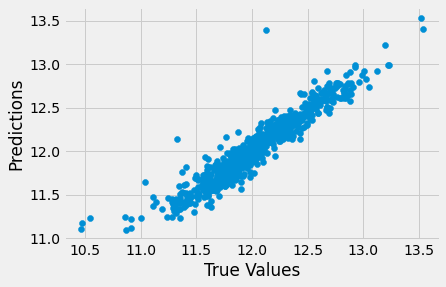

In [35]:
plt.scatter(y_train_T, predictions_T)
plt.xlabel('True Values')
plt.ylabel('Predictions')

Text(0, 0.5, 'Predictions')

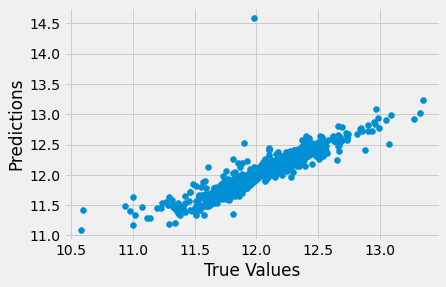

In [36]:
plt.scatter(y_test_T, y_hat_test)
plt.xlabel('True Values')
plt.ylabel('Predictions')

## Evaluation

In [37]:
# inaccuracy precent
print('Mean Absolute Error:', mean_absolute_error(y_test_T, y_hat_test))
print('Mean Squared Error:', mean_squared_error(y_test_T, y_hat_test))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test_T, y_hat_test)))
print('Mean Mean Squared Logarithmic Error:', np.sqrt(mean_squared_error(y_test_T, y_hat_test)))

Mean Absolute Error: 0.09997196111675563
Mean Squared Error: 0.030527306821731923
Root Mean Squared Error: 0.17472065367818404
Mean Mean Squared Logarithmic Error: 0.17472065367818404


## Prediction

In [38]:
y_pred = model.predict(x_test)
y_pred # - logarithmic values

array([[11.63641822],
       [12.07432875],
       [12.14697668],
       ...,
       [12.15353052],
       [11.59420353],
       [12.30827107]])

In [39]:
pred = pd.DataFrame(y_pred, columns=['SalePrice'])
df1 = pd.concat([y, pred], axis=1)

## predicted vs actual value predictions

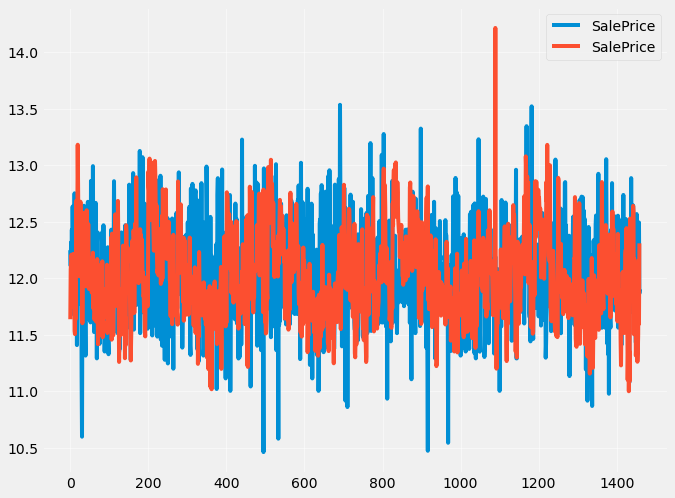

In [40]:
df1.plot(kind='line', figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='white')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [41]:
# reverse logarithmic values
regResults = np.expm1(y_pred)

# create df for results
regResults = pd.DataFrame(regResults, columns=['SalePrice'])
test['Id'].shape, regResults.shape
id_df = pd.DataFrame(test['Id'])

In [42]:
submission = pd.concat([id_df, regResults], axis=1)
submission.to_csv('prediction.csv', index=False)
submission

,Id,SalePrice
0,1461,113143.180922
1,1462,175312.092078
2,1463,188522.260971
3,1464,200378.800991
4,1465,193044.286820
...,...,...
1454,2915,84733.979776
1455,2916,98622.672336
1456,2917,189761.869825
1457,2918,108466.246701
